In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

In [2]:
# calculate CI using bootstrap
def calculateCI(data,method,n):
    m=int(len(data)/10) #take 10% data
    ms=[]
    for j in range(n): #number of samples
        if method=='mean':
                ms.append(np.mean(np.random.choice(data,m)))
        if method=='median':
                ms.append(np.median(np.random.choice(data,m)))
    a,b=[np.percentile(ms,2.5),np.percentile(ms,97.5)]
    return a,b

In [3]:
dfp = pd.read_csv(r'F:\NETDATA\SciSciNetPaperData\1950-2017\Paper.csv.zip')

In [4]:
dfp.columns = ['PaperID', 'Year', 'C5', 'Citation_Count', 'hit', 'Reference_Count',
       'Team_Size', 'Institution_Count', 'Country_Count', 'Title_Length',
       'Atyp_10pct_Z', 'Novelty_percentile', 'Disruption',
       'Disruption_percentile', 'RaoStirling', 'NIH_Count', 'NSF_Count',
       'Patent_Count', 'Newsfeed_Count', 'Tweet_Count', 'NCT_Count',
       'TeamAgeDiversity', 'Team_Diversity_Gini', 'TeamAgeMean', 'TeamAgeMax',
       'TeamAgeMin', 'Reference_Age_Mean', 'Reference_Age_Std', 'FieldID',
       'FieldName', 'FieldID2', 'FieldName2', 'JournalID']

In [5]:
Flst = ['Mathematics', 'Physics','Materials science', 'Engineering', 'Computer science',
       'Geography', 'Geology', 'Environmental science', 'Chemistry',
        'Medicine', 'Biology','Psychology', 'Economics', 'Business', 'Political science','Sociology']
dfp = dfp[dfp['FieldName'].isin(Flst)]
dfp.index = range(len(dfp))

In [6]:
dfp['Team_Age'] = dfp['TeamAgeMean'].apply(np.ceil)

# Draw Fig. 2 team age and impact/novelty/raostiring

In [17]:
Flst = ['Mathematics', 'Physics','Materials science', 'Engineering', 'Computer science',
       'Geography', 'Geology', 'Environmental science', 'Chemistry',
        'Medicine', 'Biology','Psychology', 'Economics', 'Business', 'Political science','Sociology']
colors = sns.color_palette("mako", 16)
x = range(1 , 61)
c1 = 'C5'
c2 = 'hit'
c3 = 'RaoStirling'

In [8]:
y = dfp.groupby('Team_Age')[c1].mean().reset_index()[c1].values
ylst = [dfp[dfp['FieldName']==F].groupby('Team_Age')[c1].mean().reset_index()[c1].values for F in Flst]

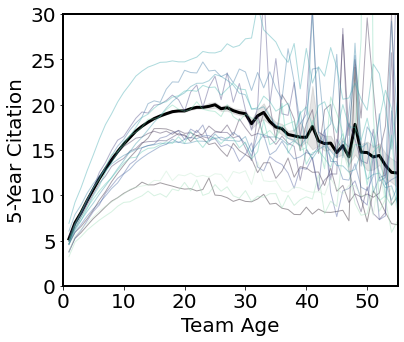

In [13]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_Age',y=c1,color='grey',n_boot=30)
plt.plot(x, y,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst)):
    plt.plot(x, ylst[i],linewidth=1,alpha = .4,c=colors[i])
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Team Age',fontsize = 20)
plt.ylabel('5-Year Citation',fontsize = 20)
plt.xlim(0,55)
plt.ylim(0,30)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 2\a.svg",bbox_inches = 'tight')

In [10]:
y2 = dfp.groupby('Team_Age')[c2].mean().reset_index()[c2].values
ylst2 = [dfp[dfp['FieldName']==F].groupby('Team_Age')[c2].mean().reset_index()[c2].values for F in Flst]

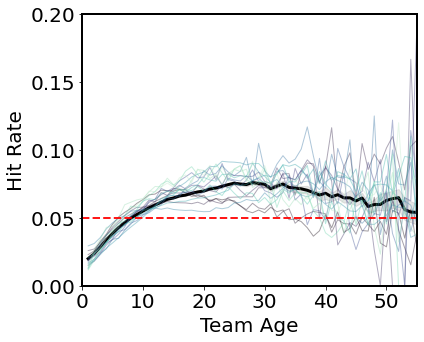

In [35]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_Age',y=c2,color='grey',n_boot=30)
plt.plot(x, y2,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst2)):
    plt.plot(x, ylst2[i],linewidth=1,alpha = .4,c=colors[i])
plt.yticks([0,0.05,0.10,0.15,0.20],fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Team Age',fontsize = 20)
plt.ylabel('Hit Rate',fontsize = 20)
plt.xlim(0,55)
plt.ylim(0,0.2)
plt.axhline(y = 0.05 , c = 'red',alpha=.9, linestyle = '--', linewidth = 2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 2\b.svg",bbox_inches = 'tight')

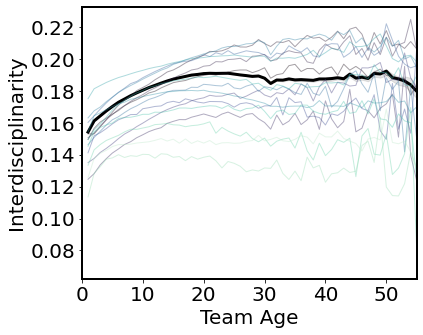

In [27]:
y3 = dfp.groupby('Team_Age')[c3].mean().reset_index()[c3].values
ylst3 = [dfp[dfp['FieldName']==F].groupby('Team_Age')[c3].mean().reset_index()[c3].values for F in Flst]
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_Age',y=c3,color='grey',n_boot=30)
plt.plot(x, y3,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst3)):
    plt.plot(x, ylst3[i],linewidth=1,alpha = .4,c=colors[i])
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Team Age',fontsize = 20)
plt.ylabel('Interdisciplinarity',fontsize = 20)
plt.xlim(0,55)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 2\d.svg",bbox_inches = 'tight')

# based on team size

In [19]:
def resetTeam(x):
    if x<9:
        return x
    else:
        return 9
dfp['TeamSizeG'] = dfp['Team_Size'].apply(resetTeam)

In [20]:
colors2 = sns.color_palette("rocket", 9)

In [21]:
y_ = dfp.groupby('Team_Age')[c1].mean()
ylst_ = [dfp[dfp['TeamSizeG']==G].groupby('Team_Age')[c1].mean() for G in range(1,10)]

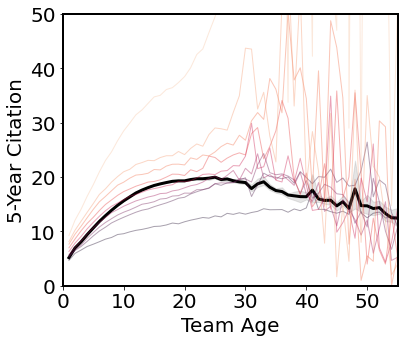

In [22]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_Age',y=c1,color='grey',n_boot=30)
plt.plot(y_.index, y_.values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst_)):
    plt.plot(ylst_[i].index, ylst_[i].values,linewidth=1,alpha = .4,c=colors2[i])
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Team Age',fontsize = 20)
plt.ylabel('5-Year Citation',fontsize = 20)
plt.xlim(0,55)
plt.ylim(0,50)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 2\a_.svg",bbox_inches = 'tight')

In [23]:
y2_ = dfp.groupby('Team_Age')[c2].mean()
ylst2_ = [dfp[dfp['TeamSizeG']==G].groupby('Team_Age')[c2].mean() for G in range(1,10)]

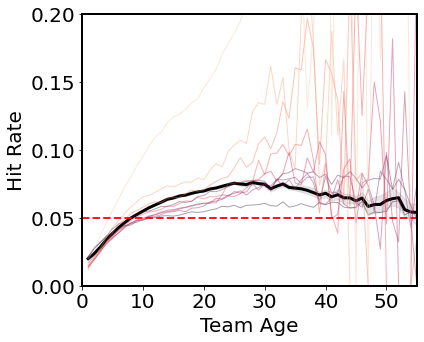

In [36]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_Age',y=c2,color='grey',n_boot=30)
plt.plot(y2_.index, y2_.values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst2_)):
    plt.plot(ylst2_[i].index, ylst2_[i].values,linewidth=1,alpha = .4,c=colors2[i])
plt.yticks([0,0.05,0.10,0.15,0.20],fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Team Age',fontsize = 20)
plt.ylabel('Hit Rate',fontsize = 20)
plt.xlim(0,55)
plt.ylim(0,0.2)
plt.axhline(y = 0.05 , c = 'red',alpha=.9, linestyle = '--', linewidth = 2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 2\b_.svg",bbox_inches = 'tight')

In [25]:
y3_ = dfp.groupby('Team_Age')[c3].mean()
ylst3_ = [dfp[dfp['TeamSizeG']==G].groupby('Team_Age')[c3].mean() for G in range(1,10)]

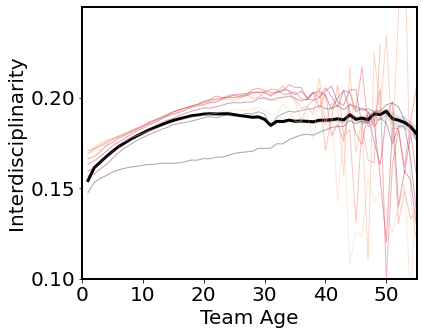

In [26]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_Age',y=c3,color='grey',n_boot=30)
plt.plot(y3_.index, y3_.values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst3_)):
    plt.plot(ylst3_[i].index,ylst3_[i].values,linewidth=1,alpha = .4,c=colors2[i])
plt.yticks([0.1,0.15,0.20],fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Team Age',fontsize = 20)
plt.ylabel('Interdisciplinarity',fontsize = 20)
plt.xlim(0,55)
plt.ylim(0.1,0.25)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 2\c_.svg",bbox_inches = 'tight')

# Distribution

In [7]:
d1 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c1].mean())  
d2 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c2].mean())
d1 = d1.loc[Flst,:]
d2 = d2.loc[Flst,:]

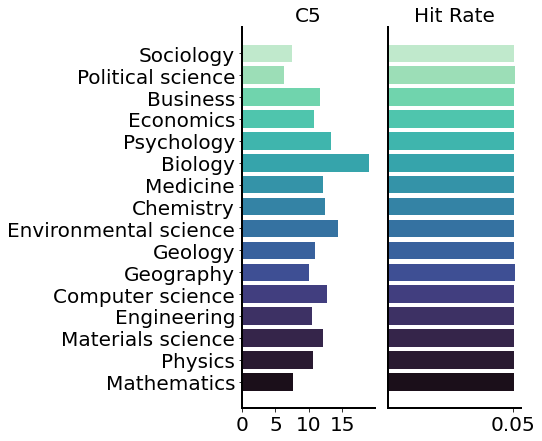

In [23]:
d1 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c1].mean())  
d2 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c2].mean())
d1 = d1.loc[Flst,:]
d2 = d2.loc[Flst,:]

plt.subplots(1,2,figsize=(5,7))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.1,hspace=0.3)
ax = plt.subplot(1,2, 1)
plt.barh( d1.index ,  d1.values.flatten(), capsize = 3, color = colors)
# plt.ylim(-.7,15.7)
# plt.xlim(0,20)
plt.xticks(fontsize=20,)
plt.yticks(fontsize=20,)
plt.title('C5',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax = plt.subplot(1,2, 2)
plt.barh( d2.index ,  d2.values.flatten(), capsize = 3, color = colors)
# plt.ylim(-.7,15.7)
# plt.xlim(0,0.06)
plt.xticks([0.05],fontsize=20,)
plt.yticks([])
plt.title('Hit Rate',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 2\m.svg",bbox_inches = 'tight')

In [28]:
d11 = pd.DataFrame(dfp.groupby(dfp['TeamSizeG'])[c1].mean())  
d21 = pd.DataFrame(dfp.groupby(dfp['TeamSizeG'])[c2].mean())
d31 = pd.DataFrame(dfp.groupby(dfp['TeamSizeG'])[c3].mean())

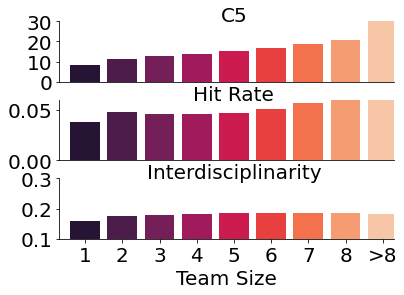

In [29]:
plt.subplots(3,1,figsize=(6,4))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0.3)
ax = plt.subplot(3,1, 1)
plt.bar( d11.index ,  height=d11.values.flatten(), capsize = 3, color = colors2)
plt.xlim(.3,9.3)
plt.ylim(0,30)
plt.yticks(fontsize=20,)
plt.xticks([])
plt.text(5,30,'C5',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(3,1, 2)
plt.bar( d21.index ,  height=d21.values.flatten(), capsize = 3, color = colors2)
plt.xlim(.3,9.3)
plt.ylim(0,0.06)
plt.yticks([0,0.05],fontsize=20,)
plt.xticks([])
plt.text(5,0.06,'Hit Rate',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(3,1, 3)
plt.bar( d31.index ,  height=d31.values.flatten(), capsize = 3, color = colors2)
plt.xlim(.3,9.3)
plt.ylim(0.1,0.3)
plt.yticks(fontsize=20,)
plt.xticks(range(1,10),[1,2,3,4,5,6,7,8,'>8'],fontsize=20)
plt.text(5,0.3,'Interdisciplinarity',fontsize = 20, horizontalalignment='center')
plt.xlabel('Team Size',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 2\n.svg",bbox_inches = 'tight')

In [30]:
d1 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c1].mean())  
d2 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c2].mean())
d3 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c3].mean())
d1 = d1.loc[Flst,:]
d2 = d2.loc[Flst,:]
d3 = d3.loc[Flst,:]

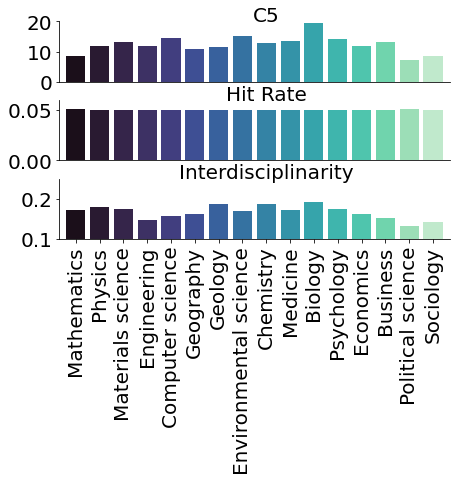

In [31]:
plt.subplots(3,1,figsize=(7,4))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0.3)
ax = plt.subplot(3,1, 1)
plt.bar( d1.index ,  height=d1.values.flatten(), capsize = 3, color = colors)
plt.xlim(-.7,15.7)
plt.ylim(0,20)
plt.yticks(fontsize=20,)
plt.xticks([])
plt.text(8,20,'C5',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(3,1, 2)
plt.bar( d2.index ,  height=d2.values.flatten(), capsize = 3, color = colors)
plt.xlim(-.7,15.7)
plt.ylim(0,0.06)
plt.yticks([0,0.05],fontsize=20,)
plt.xticks([])
plt.text(8,0.06,'Hit Rate',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(3,1, 3)
plt.bar( d3.index ,  height=d3.values.flatten(), capsize = 3, color = colors)
plt.xlim(-.7,15.7)
plt.ylim(0.1,0.25)
plt.yticks([0.1,0.2],fontsize=20,)
plt.xticks(fontsize=20,rotation=90)
plt.text(8,0.25,'Interdisciplinarity',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 2\m.svg",bbox_inches = 'tight')

In [36]:
d11 = pd.DataFrame(dfp.groupby(dfp['TeamSizeG'])[c1].mean())  
d21 = pd.DataFrame(dfp.groupby(dfp['TeamSizeG'])[c2].mean())
d31 = pd.DataFrame(dfp.groupby(dfp['TeamSizeG'])[c3].mean())

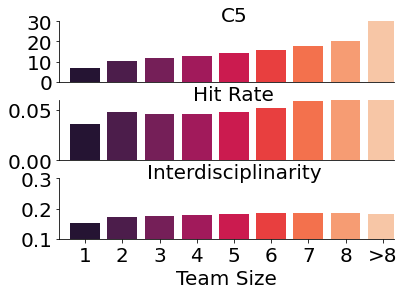

In [37]:
plt.subplots(3,1,figsize=(6,4))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0.3)
ax = plt.subplot(3,1, 1)
plt.bar( d11.index ,  height=d11.values.flatten(), capsize = 3, color = colors2)
plt.xlim(.3,9.3)
plt.ylim(0,30)
plt.yticks(fontsize=20,)
plt.xticks([])
plt.text(5,30,'C5',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(3,1, 2)
plt.bar( d21.index ,  height=d21.values.flatten(), capsize = 3, color = colors2)
plt.xlim(.3,9.3)
plt.ylim(0,0.06)
plt.yticks([0,0.05],fontsize=20,)
plt.xticks([])
plt.text(5,0.06,'Hit Rate',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(3,1, 3)
plt.bar( d31.index ,  height=d31.values.flatten(), capsize = 3, color = colors2)
plt.xlim(.3,9.3)
plt.ylim(0.1,0.3)
plt.yticks(fontsize=20,)
plt.xticks(range(1,10),[1,2,3,4,5,6,7,8,'>8'],fontsize=20)
plt.text(5,0.3,'Interdisciplinarity',fontsize = 20, horizontalalignment='center')
plt.xlabel('Team Size',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 2\n.svg",bbox_inches = 'tight')

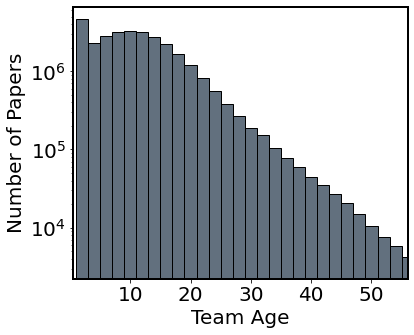

In [32]:
f, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=dfp, x="Team_Age", binwidth=2,color = '#2E4053')
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Team Age',fontsize = 20)
plt.ylabel('Number of Papers',fontsize = 20)
plt.xlim(0.5,56)
plt.yscale('log')
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 2\o.svg",bbox_inches = 'tight')